# Overview

Notebook for creating plots that shows the spatial distribution of data in Cataluña.

Software used: geopandas phyton library.

In [1]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt

Root to the data file:

In [2]:
data_dir= 'carto'

# Create Cataluña map
IT IS NOT NECESSARY TO RUN AGAIN THIS NOTEBOOK SECTION. THE DATA IS ALREADY ON CARTO DIRECTORY.

Notebook section used to create the Cataluña (only provinces) map from Spain map.

Downloaded from http://centrodedescargas.cnig.es/CentroDescargas/index.jsp > Mapas vectoriales y Bases Cartográficas y Topográficas:

    BCN500
    Description: Base Cartográfica Nacional a escala 1:500.000.
    SGR: ETRS89. Coordenadas geográficas longitud y latitud.
    Download entity: toda España y por capas temáticas.
    Format: shapefile (.shp)

In [3]:
# Load shape file into GeoDataFrame
spain = gpd.read_file(data_dir + "/BCN500_0101S_LIMITE_ADM.shp", crs="EPSG:4326")

# Filter countries out, with boolean filtering, just as you would do for pandas DataFrames
# CCAA is the abbreviation for Autonomous region in Spain
spain = spain[~spain["CCAA"].isin(["SAHARA OCCIDENTAL", "ALGERIA", "PORTUGAL", 'MARRUECOS', 'MAURITANIA','FRANCIA', 'ANDORRA'])]
Cataluña = spain[spain["CCAA"].isin(['Cataluña'])]

<Axes: >

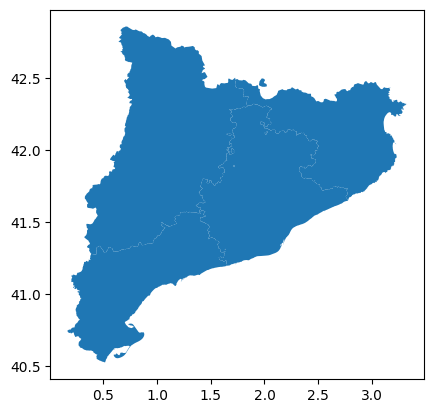

In [4]:
Cataluña.plot()

## Cataluña's map info

Explanation of Files in a Shapefile
.shp (Shape File):

Contains the geometry data of the features (e.g., points, lines, polygons).
This is the core file that defines the spatial structure of the regions.
.shx (Index File):

A companion index file that speeds up spatial queries and links the geometry in the .shp file to the attribute data in .dbf.
.dbf (Attribute Table):

Stores tabular data associated with the geometries. Each row corresponds to a feature (e.g., a province), and columns contain attributes like name, area, population, etc.
.cpg (Code Page File):

Specifies the character encoding for the text in the .dbf file, ensuring special characters (e.g., accents in Spanish) are correctly displayed.
.prj (Projection File):

If present, defines the spatial reference and projection system (e.g., WGS84, EPSG:4326) used for the coordinates in the .shp file.
.dbj (A less common companion file):

Could be a part of specific workflows and may contain supplementary metadata or settings.

In [5]:
# in several files including a shp file
Cataluña.to_file(data_dir + "/Cataluña.shp")

Check the complementary files for the regions

In [9]:
import geopandas as gpd

# Ruta al archivo shapefile (incluye todos los archivos relacionados en el mismo directorio)
catalunya_path = data_dir + "/Cataluña.shp"

# Cargar el shapefile en un GeoDataFrame
catalunya = gpd.read_file(catalunya_path)

# Ver las primeras filas del GeoDataFrame
print(catalunya.head())

    ID ID_CODIGO ID_TTOPO      FECHA_ALTA TIPO_0101      CCAA   ETIQUETA  \
0   46     0101S     None  20100924000000        03  Cataluña     Lleida   
1   48     0101S     None  20100924000000        03  Cataluña     Girona   
2   96     0101S     None  20100924000000        03  Cataluña  Barcelona   
3  110     0101S     None  20100924000000        03  Cataluña  Tarragona   

                                            geometry  
0  MULTIPOLYGON Z (((1.71875 41.88240 0.00000, 1....  
1  MULTIPOLYGON Z (((3.22843 42.04115 0.00000, 3....  
2  MULTIPOLYGON Z (((1.64563 41.19534 0.00000, 1....  
3  MULTIPOLYGON Z (((1.63533 41.30952 0.00000, 1....  


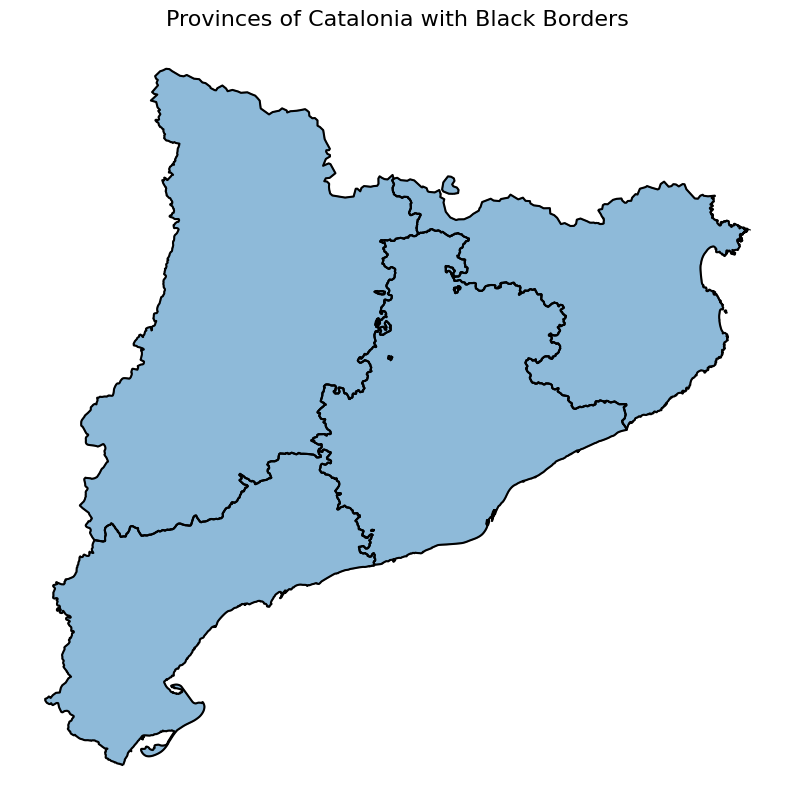

In [11]:
# Import necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt


catalunya_path = data_dir + "/Cataluña.shp"

# Read the shapefile using geopandas
catalunya_gdf = gpd.read_file(catalunya_path)

# Plot the provinces of Catalonia with black borders
fig, ax = plt.subplots(figsize=(10, 10))
catalunya_gdf.boundary.plot(ax=ax, color="black")  # Plot boundaries in black
catalunya_gdf.plot(ax=ax, edgecolor="black", alpha=0.5)  # Fill provinces with semi-transparent color

# Add title and remove axis for clarity
ax.set_title("Provinces of Catalonia with Black Borders", fontsize=16)
ax.axis("off")

# Show the plot
plt.show()
